In [ ]:
# The specified fiji install does not seem to ship with rigid registration plugin.  I directed it to my local install.  Just replace the path with the one to your own.
import imagej
#ij = imagej.init('sc.fiji:fiji')

# Rigid Registration does not have a headless version.  You need to specify that ImageJ will NOT be operating in headless mode.
ij = imagej.init('/Applications/Fiji.app', headless=False)

Added 473 JARs to the Java classpath.


In [ ]:
from skimage import io
import numpy as np

In [ ]:
import os
cwd = os.getcwd()

In [4]:
from jnius import autoclass
WindowManager = autoclass('ij.WindowManager')

In [5]:
Img1 = io.imread('https://acdbio.com/sites/default/files/styles/sample_image/public/M-IL-8-8-hr_0.jpg')
Img2 = io.imread('https://acdbio.com/sites/default/files/styles/sample_image/public/M-IL-8-8-hr_0.jpg')

In [6]:
img_1 = np.mean(Img1,axis=2)
img_2 = np.mean(Img2,axis=2)

In [7]:
imshape = np.shape(img_1)

In [8]:
# Since both images are the same, lets make image1 a translated version of itself.  This will let us see if the plugin worked.
translated_img = np.zeros(imshape)
translated_img[40:, 40:] = img_1[0:(imshape[0]-40), 0:(imshape[1]-40)]

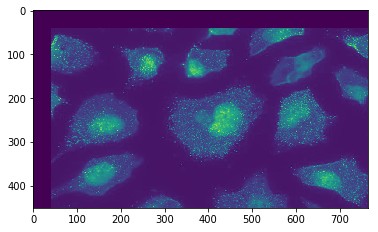

In [9]:
ij.py.show(translated_img)

In [10]:
im1_name = 'img1.tif'
im2_name = 'img2.tif'
im1_path = os.path.join(cwd, 'img1.tif').replace('\\', '/')
im2_path = os.path.join(cwd, 'img2.tif').replace('\\', '/')

In [11]:
# Save the images to the file system
io.imsave(arr=translated_img.astype(np.int8), fname=im1_name)
io.imsave(arr=img_2.astype(np.int8), fname=im2_name)

In [12]:
# It is important to open the image being registered / the moving image (i.e., image 2) second, as the Rigid Registration plugin works on the current active window.  You could probably select it too, if you want to be doing multiple operations.
ij.py.run_macro("""open("{}")""".format(im1_path))
ij.py.run_macro("""open("{}")""".format(im2_path))

<org.scijava.script.ScriptModule at 0x1949abb2200 jclass=org/scijava/script/ScriptModule jself=<LocalRef obj=0x-1a10dd8 at 0x1949c829f90>>

In [13]:
# I wasn't able to get the plugin format working - the registration will output the transform, but it will not output a transformed image.  This is likely due to a name formatting issue for the last variable. 
plugin = 'Rigid Registration'

args = { 
    'initialtransform': [],
    'n': 1,
    'tolerance': 1.000,
    'level': 4,
    'stoplevel': 2,
    'materialcenterandbbox': [],
    'showtransformed': 1,
    'template': im1_name,
    'measure': 'Correlation',
    'im2_name': True
}

In [14]:
# You can get around this by directly making the macro string.  The following command demonstrates how to do it dynamically, as it uses .format() to target the two image names.  You can also do that for any of the parameters, as a stop gap till we figure out why the plugin-centric method isn't working.

macro = """run("Rigid Registration", "initialtransform=[] n=1 tolerance=1.000 level=6 stoplevel=2 materialcenterandbbox=[] template={} measure=Euclidean {}")""".format(im1_name, im2_name)

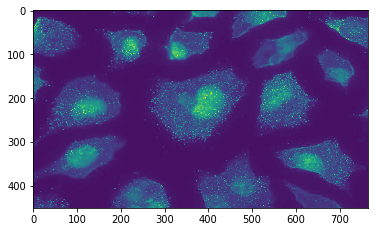

In [15]:
# Just showing that prior to the macro, the current window is that of image2
window_of_img2 = WindowManager.getCurrentImage()
ij.py.show(window_of_img2)

In [16]:
#ij.py.run_plugin(plugin, args)

In [17]:
ij.py.run_macro(macro)

<org.scijava.script.ScriptModule at 0x1949c85ca98 jclass=org/scijava/script/ScriptModule jself=<LocalRef obj=0x-6fe0dbf0 at 0x1949c829e10>>

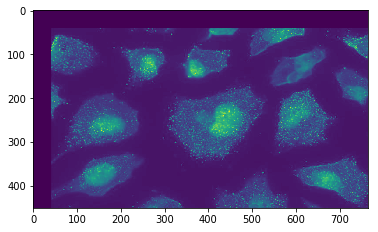

In [18]:
# We see now that the current window is the transformed one
result = WindowManager.getCurrentImage()
ij.py.show(result)

In [19]:
# Get the numpy array out of the image.  You must do this before closing the windows.
result_array = ij.py.from_java(result)
result_array

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 13., 15., 16.],
       [ 0.,  0.,  0., ..., 18., 17., 16.],
       [ 0.,  0.,  0., ..., 18., 17., 15.]])

In [20]:
# Close the windows in Fiji.
WindowManager.closeAllWindows()

True

In [21]:
# Delete the intermediate files on your file system.
os.remove(im1_path)
os.remove(im2_path)